# 1. Multivariate regression
In most of the real life use cases there will be more than one independent variable, so the concept of having multiple independent variables is called as multivariate regression. The equation takes the form: \\(y=m_1x_1+m_2x_2+m_3x_3+...+m_nx_n\\), where each independent variable is represented by *x*’s, and *m*’s are the corresponding coefficients.

## Exercise 1: Import needed modules

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from sklearn.model_selection import train_test_split

**Question:**
1. What purpose was each of these modules imported for?

**Answer:**



- **statsmodels.api**: This is a heavy hitter for statistical modeling, especially for regression analysis like we're doing here. It provides tools for building and analyzing statistical models, including getting detailed summaries of the results.
- **pandas**: This is our go-to for working with data in a structured way, like tables (DataFrames). It's essential for loading, cleaning, and manipulating the housing data.
- **numpy**: Great for numerical operations and working with arrays. We'll often see it used alongside pandas for calculations and data transformations.
- **matplotlib.pyplot**: This is for creating visualizations, like plots and charts. We'll use it to visualize things like correlations and residuals.
- **sklearn.preprocessing**: This module has tools for getting your data ready for modeling, like transforming categorical variables or scaling features. We saw LabelBinarizer from here!
- **sklearn.metrics**: Useful for evaluating how well your model is performing. It provides functions to calculate metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
- **statsmodels.stats.outliers_influence**: This part of statsmodels is specifically for analyzing the influence of individual data points, helping us identify potential outliers.
- **sklearn.model_selection**: Important for splitting your data into training and testing sets, which is crucial for evaluating your model's performance on unseen data and preventing overfitting.

## Exercise 2: Input data
We'll be using the housing data from the **Housing_Modified.csv** file. The housing data contains sales prices of houses in the city of Windsor. Below is a brief description about each variables.
- price: sale price of a house
- lotsize: the lot size of a property in square feet
- bedrooms: number of bedrooms
- bathrms: number of full bathrooms
- stories: number of stories excluding basement
- driveway: does the house has a driveway ?
- recroom: does the house has a recreational room ?
- fullbase: does the house has a full finished basement ?
- gashw: does the house uses gas for hot water heating ?
- airco: does the house has central air conditioning ?
- garagepl: number of garage places
- prefarea: is the house located in the preferred neighbourhood of the city ?

In [ ]:
# Load data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab05/Housing_Modified.csv')
print(df.head())

Mounted at /content/drive
     price  lotsize  bedrooms  bathrms stories driveway recroom fullbase  \
0  42000.0     5850         3        1     two      yes      no      yes   
1  38500.0     4000         2        1     one      yes      no       no   
2  49500.0     3060         3        1     one      yes      no       no   
3  60500.0     6650         3        1     two      yes     yes       no   
4  61000.0     6360         2        1     one      yes      no       no   

  gashw airco  garagepl prefarea  
0    no    no         1       no  
1    no    no         0       no  
2    no    no         0       no  
3    no    no         0       no  
4    no    no         0       no  


**Questions:**
1. On what scales the individual variables are measured?
2. Which variables in their original form are not suitable for the model? Justify your answer.

**Answers:**


1. The variables seem to be measured based on the data and descriptions are:
   - `price`: This is the sale price, so it's a continuous numerical scale (dollars).
   - `lotsize`: The lot size in square feet, another continuous numerical scale.
   - `bedrooms`: Number of bedrooms, a discrete numerical scale.
   - `bathrms`: Number of full bathrooms, also a discrete numerical scale.
   - `stories`: Number of stories, excluding the basement. This is presented as categories ('one', 'two', 'three', 'four') which is a nominal categorical scale.
   - `driveway`: Whether the house has a driveway, a binary categorical scale ('yes' or 'no').
   - `recroom`: Whether the house has a recreational room, a binary categorical scale ('yes' or 'no').
   - `fullbase`: Whether the house has a full finished basement, a binary categorical scale ('yes' or 'no').
   - `gashw`: Whether the house uses gas for hot water heating, a binary categorical scale ('yes' or 'no').
   - `airco`: Whether the house has central air conditioning, a binary categorical scale ('yes' or 'no').
   - `garagepl`: Number of garage places, a discrete numerical scale.
   - `prefarea`: Whether the house is in a preferred neighborhood, a binary categorical scale ('yes' or 'no').
2. Variables that are not suitable for the model in their original form are the categorical ones, specifically:
   - `stories`: This variable has more than two categories ('one', 'two', 'three', 'four'). Most regression models can't directly handle text categories like these. They need to be converted into a numerical format that represents these categories.
   - `driveway`, `recroom`, `fullbase`, `gashw`, `airco`, `prefarea`: These are binary categorical variables ('yes'/'no'). While some models can handle binary directly if they are represented as 0 and 1, it's generally best practice to convert them to numerical binary (0 or 1) to ensure the model interprets them correctly. The current 'yes'/'no' strings aren't numerical and won't work in most standard regression algorithms.


## Exercise 3: Data preprocessing
Several variables will be converted before the model is built. We will use for this purpose the **LabelBinarizer** class and **get_dummies()** function.

In [4]:
# Convert binary fields to numeric boolean fields
lb = preprocessing.LabelBinarizer()

df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0


In [5]:
# Create dummy variables for stories
df_stories = pd.get_dummies(df['stories'], prefix = 'stories', drop_first = True)

# Join the dummy variables to the main dataframe
df = pd.concat([df, df_stories], axis = 1)
del df['stories']

df.stories_one = lb.fit_transform(df.stories_one)
df.stories_three = lb.fit_transform(df.stories_three)
df.stories_two = lb.fit_transform(df.stories_two)

df.head()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,1,0,0
3,60500.0,6650,3,1,1,1,0,0,0,0,0,0,0,1
4,61000.0,6360,2,1,1,0,0,0,0,0,0,1,0,0


**Questions:**
1. What is the result of using the **LabelBinarizer** class?
2. What is the result of using the **get_dummies()** function?

**Answers:**

1. Using **LabelBinarizer** on a binary categorical variable like 'driveway' converts the text values ('yes' and 'no') into numerical binary values (1 and 0). This makes these variables suitable for use in a regression model.
2. The **get_dummies()** function is used for categorical variables with more than two categories, like 'stories'. It creates new binary columns for each unique category in the original variable (except for one, to avoid multicollinearity). In this case, it created 'stories_one', 'stories_three', and 'stories_two' columns, where a '1' indicates the presence of that story count and a '0' indicates its absence. This one-hot encoding allows the model to interpret the different story categories numerically.

## Exercise 4: Correlation plot

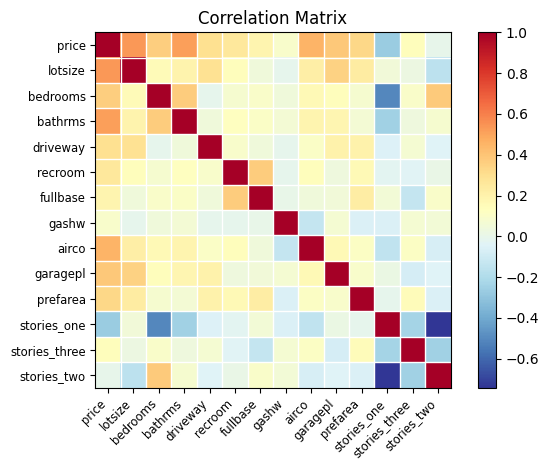

                  price   lotsize  bedrooms   bathrms  driveway   recroom  \
price          1.000000  0.535796  0.366447  0.516719  0.297167  0.254960   
lotsize        0.535796  1.000000  0.151851  0.193833  0.288778  0.140327   
bedrooms       0.366447  0.151851  1.000000  0.373769 -0.011996  0.080492   
bathrms        0.516719  0.193833  0.373769  1.000000  0.041955  0.126892   
driveway       0.297167  0.288778 -0.011996  0.041955  1.000000  0.091959   
recroom        0.254960  0.140327  0.080492  0.126892  0.091959  1.000000   
fullbase       0.186218  0.047487  0.097201  0.102791  0.043428  0.372434   
gashw          0.092837 -0.009201  0.046028  0.067365 -0.011942 -0.010119   
airco          0.453347  0.221765  0.160412  0.184955  0.106290  0.136626   
garagepl       0.383302  0.352872  0.139117  0.178178  0.203682  0.038122   
prefarea       0.329074  0.234782  0.078953  0.064013  0.199378  0.161292   
stories_one   -0.270058  0.054348 -0.509974 -0.250784 -0.053249 -0.022632   

In [6]:
# Let's plot correlation matrix using statmodels graphics packages's plot_corr()
corr = df.corr()
sm.graphics.plot_corr(corr, xnames = list(corr.columns))
plt.show()

print(corr)

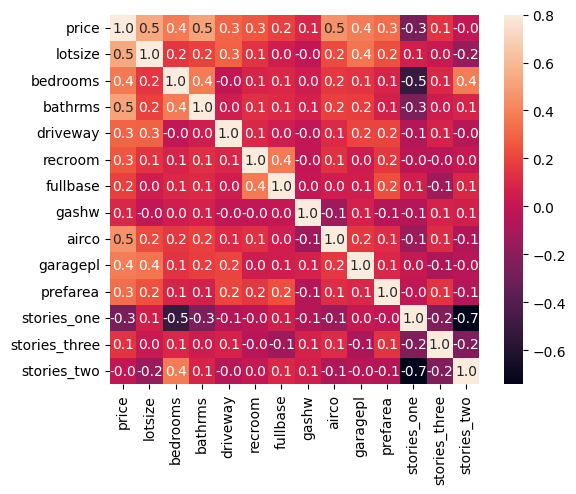

In [7]:
# Alternatively we can use seaborn package
import seaborn as sns

sns.heatmap(df.corr(), vmax = .8, square = True, annot = True, fmt = '.1f')
plt.show()

**Questions:**
1. What are the 3 pairs of variables most strongly correlated with each other? What are their correlation coefficients?
2. Which correlation plot do you think is more convenient to use and why?

**Answers:**


1. Looking at the correlation matrix and the heatmap, the 3 pairs of variables most strongly correlated with each other (excluding the correlation of a variable with itself) appear to be:
   - `price` and `lotsize` (0.54)
   - `price` and `bathrms` (0.52)
   - `bedrooms` and `stories_one` (-0.51) - This is a strong negative correlation.

2. In my opinion, the seaborn heatmap is more convenient to use because it provides a visual representation of the correlations with color intensity, making it easier to quickly identify strong positive and negative correlations at a glance. The annotations on the heatmap also directly show the correlation coefficients, which is helpful.

## Exercise 5: Variation Inflation Factor
VIF value of greater than 10 is an indicator of a strong multicollinearity, and these variables should be excluded from the regression model.

In [8]:
# Create a Python list of feature names
independent_variables = ['lotsize', 'bedrooms', 'bathrms','driveway', 'recroom',
                         'fullbase','gashw','airco','garagepl', 'prefarea',
                        'stories_one','stories_two','stories_three']

# Use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']

thresh = 10

for i in np.arange(0, len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('vif:', vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break

print('Final variables:', independent_variables)

vif: [np.float64(8.958098087844336), np.float64(18.469878559519948), np.float64(8.984672347290864), np.float64(7.08857854209188), np.float64(1.4770152815033917), np.float64(2.013320236472385), np.float64(1.1034879198994192), np.float64(1.756746206560902), np.float64(1.9826489313438442), np.float64(1.5332946465459893), np.float64(3.9657526747868594), np.float64(5.511702408354892), np.float64(1.7700402770614867)]
dropping 'bedrooms' at index: 1
Final variables: ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_two', 'stories_three']


**Questions:**
1. Which variable was removed from the data set? What was its VIF value?

**Answers:**

1. Based on the VIF output, the variable removed from the dataset was 'bedrooms'. Its VIF value was 18.47, which is greater than the threshold of 10, indicating strong multicollinearity.

## Exercise 6: Create a model
We split the data into train / test of 80 / 20 percent respectively.

In [9]:
# Use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, random_state = 1)

# Create a fitted model
lm = sm.OLS(y_train, X_train).fit()

# Print the summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              731.3
Date:                Fri, 26 Sep 2025   Prob (F-statistic):                   1.46e-274
Time:                        16:39:48   Log-Likelihood:                         -4828.1
No. Observations:                 436   AIC:                                      9680.
Df Residuals:                     424   BIC:                                      9729.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

## Exercise 7: Evaluate a model

In [10]:
# Make predictions on the testing set
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
y_pred = lm.predict(X) # full data

print('\nTrain MAE: ', metrics.mean_absolute_error(y_train, y_train_pred))
print('Train RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

print('\nTest MAE: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Test RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('\nFull Data MAE: ', metrics.mean_absolute_error(y, y_pred))
print('Full Data RMSE: ', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Train MAE:  11987.660160035877
Train RMSE:  15593.474917800835

Test MAE:  12722.079675396282
Test RMSE:  17509.25004003038

Full Data MAE:  12135.620135657939
Full Data RMSE:  15997.901569773376


**Question:**
1. What conclusions can you draw from the MEA and RMSE values for the training, test and full datasets?

**Answer:**

## Exercise 8: Outliers
We will plot normalized residual vs. leverage to understand the outlier points. Remember that **residual** is a difference between the actual and predicted value. **Leverage** is a measure of how far away the independent variable values of an observation are from those of the other observations.

Next, we will perform the Bonferroni outlier test to find the Bonferroni **p-value** for the most extreme observation. If the **p-value** is <= 0.05 it is an outlier.

Bad data points (bonf(p) <= 0.05):
     student_resid   unadj_p   bonf(p)
161       3.925355  0.000101  0.044067
377       4.430868  0.000012  0.005219


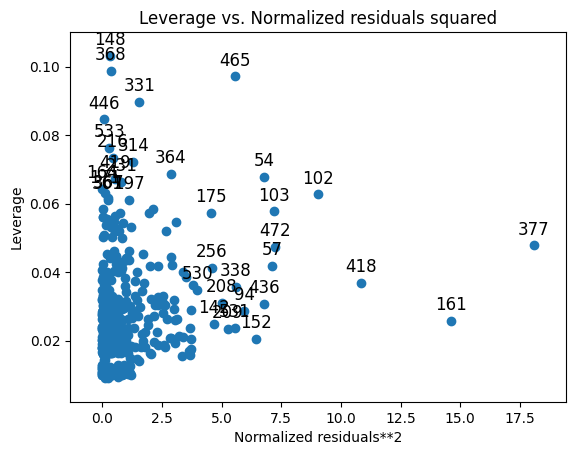

In [11]:
# Lets plot the normalized residual vs. leverage
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig = plot_leverage_resid2(lm)

# Find outliers using the Bonferroni outlier test
test = lm.outlier_test()

print('Bad data points (bonf(p) <= 0.05):')
print(test[test['bonf(p)'] <= 0.05])

**Questions:**
1. Which observations were considered outliers and why?
2. Please explain why outliers should be removed from the training dataset?

**Answers:**

1. Looking at the output from the Bonferroni outlier test, observations with indices 161 and 377 were flagged as outliers. This is because their Bonferroni p-values were really low (less than 0.05), which suggests they are statistically significant outliers.

2. Outliers are usually removed from the training data because they can really mess up the model. Think of it like trying to find the average height of a class, but one person is a giant and another is really small. Those extreme values would pull the average away from what's typical for most of the class. In regression, outliers can skew the line the model tries to fit to the data, making it less accurate for the majority of the data points. Removing them helps the model focus on the general patterns in the data.

## Exercise 9: Homoscedasticity and normality
Residual should be scattered and not have any patterns (homoscedasticity) and the distribution of residual should be normal (normality). If the residual plot is not scattered or not normally distributed then there is a chance that independent variable is not having linear relationship and applying appropriate transformation to the independent variable will fix the issue.

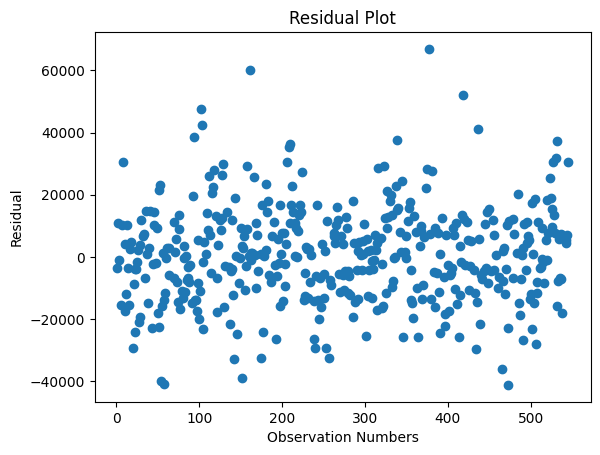

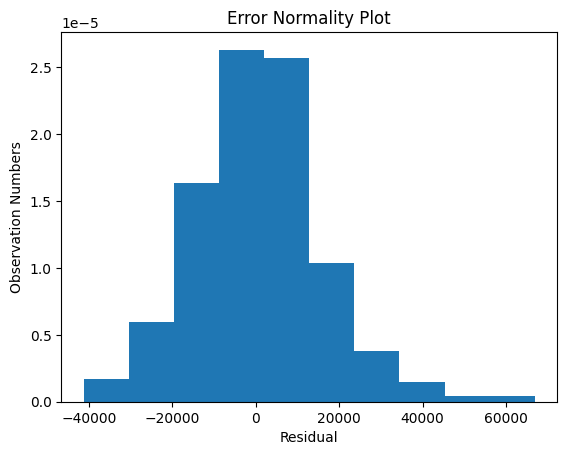

In [12]:
# Plot to check homoscedasticity
plt.plot(lm.resid, 'o')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Observation Numbers')
plt.show()

# Normality plot
plt.hist(lm.resid, density = True)
plt.title('Error Normality Plot')
plt.xlabel('Residual')
plt.ylabel('Observation Numbers')
plt.show()

**Question:**
1. In your opinion, are the assumptions regarding homoscedasticity and normality fulfilled? Justify your answer.

**Answer:**


- **Homoscedasticity:** The residual plot (Residual vs. Observation Numbers) shows the residuals scattered around zero. There isn't a clear pattern or fanning out of the residuals as the observation numbers increase. This suggests that the variance of the residuals is roughly constant across all levels of the independent variables, which supports the assumption of homoscedasticity.

- **Normality:** The error normality plot (histogram of residuals) appears somewhat bell-shaped, although it might have a slight skew or some outliers on the tails. Ideally, for perfect normality, it would be a smooth, symmetrical bell curve. While it's not perfectly normal, it's not drastically different from a normal distribution either. So, while not perfectly met, the normality assumption seems reasonably fulfilled based on this histogram.

In conclusion, the homoscedasticity assumption seems to be reasonably met, while the normality assumption is somewhat met, but not perfectly.

## Exercise 10: Linearity plots
It is possible to check the influence of all the regressors (independent variables) on the dependent variable using the **plot_partregress_grid()** function.

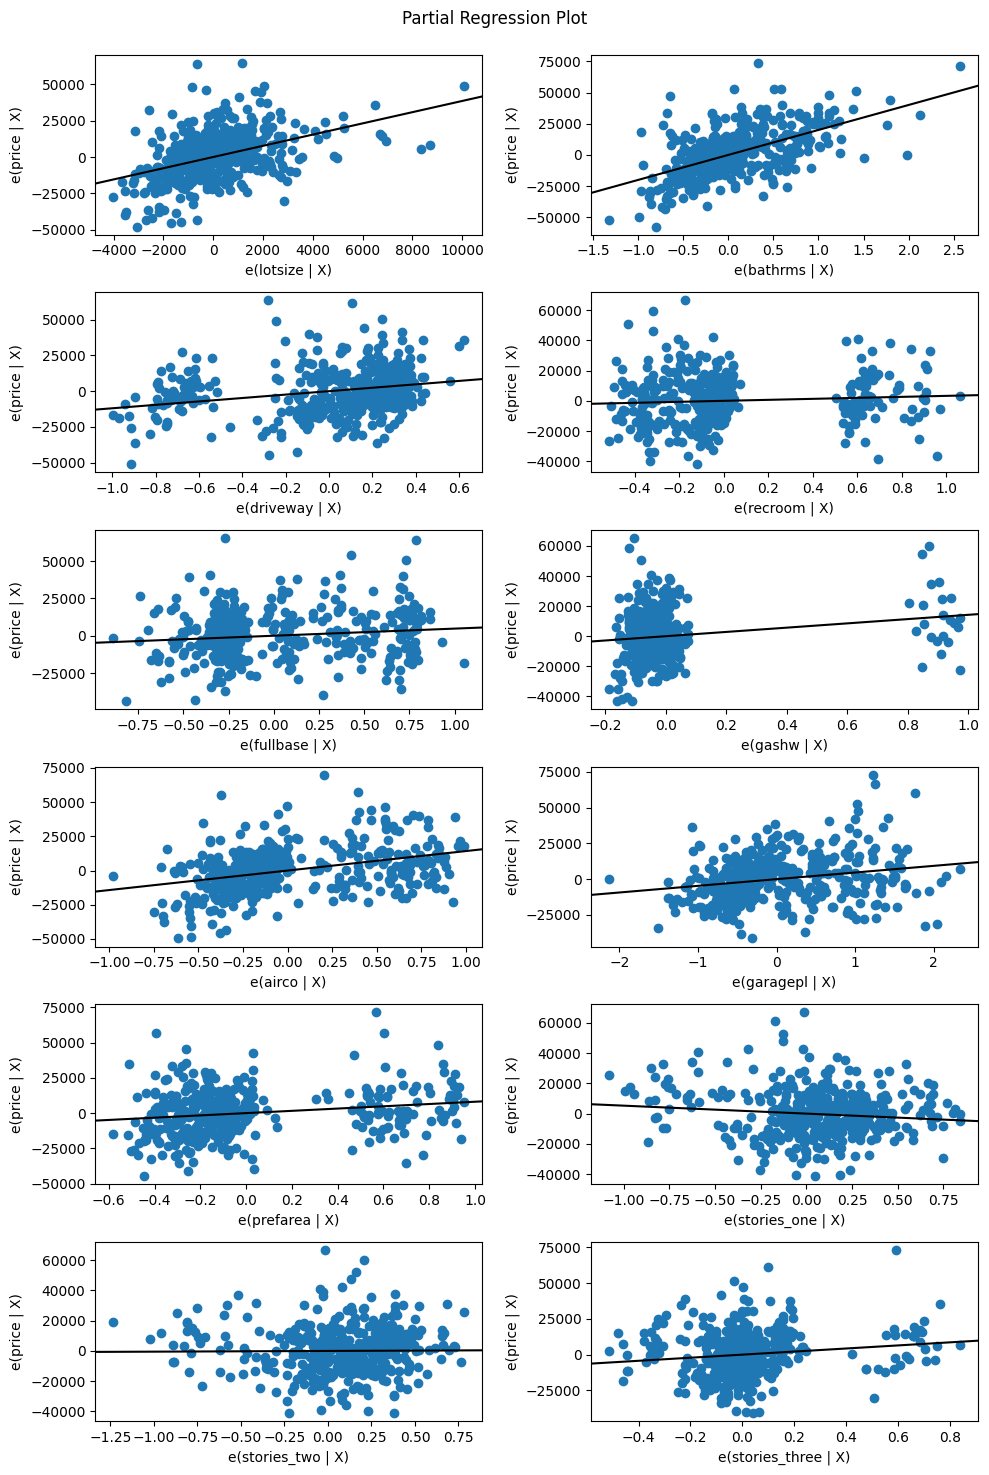

In [13]:
# Linearity plots
fig = plt.figure(figsize = (10, 15))
fig = sm.graphics.plot_partregress_grid(lm, fig = fig)

**Question:**
1. On the basis of the above partial regression plot, explain which variables do you think are the best and which are the worst for building a regression model? Justify your answer.

**Answer:**

The **best variables** for the model seem to be those with clear linear trends in the partial regression plots and noticeable slopes, like `lotsize`, `bathrms`, `airco`, `garagepl`, and `prefarea`.

The **worst variables** appear to be those with scattered points and flat lines, indicating a weak linear relationship with price when other variables are considered. These look like `recroom`, `fullbase`, and `gashw`.

The `stories` dummy variables show influence through distinct clusters and varying slopes.

## Exercise 11: Regularization
With an increase in number of variables, and increase in model complexity, the probability of over-fitting also increases. **Regularization** is a technique to avoid over-fitting problem. **Over-fitting** occurs when the model fits the data too well capturing all the noises. In this case we can notice a high accuracy in the training data set, whereas the same model will result a low accuracy on test data set. This means the model has fitted the line so well to the train data set that it failed to generalize it to fit well on unseen data set.

In [14]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model

# Load data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab05/Grade_Set_2.csv')
df.columns = ['x', 'y']

for i in range(2, 50):   # Power of 1 is already there
    colname = 'x_%d' % i  # New var will be x_power
    df[colname] = df['x'] ** i

independent_variables = list(df.columns)
independent_variables.remove('y')

X = df[independent_variables]    # Independent variable
y = df.y                         # Dependent variable

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, random_state = 1)

# Ridge regression
lr = linear_model.Ridge(alpha = 0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('------ Ridge Regression ------')
print('Train MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

print('Test MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Ridge Coef:', lr.coef_)

# LASSO regression
lr = linear_model.Lasso(alpha = 0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('\n----- LASSO Regression -----')
print('Train MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Test MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('LASSO Coef:', lr.coef_)

------ Ridge Regression ------
Train MAE: 13.23303648873574
Train RMSE: 16.87259547067167
Test MAE: 21.973745021751768
Test RMSE: 22.009112336405487
Ridge Coef: [ 8.67127091e-89  1.13658541e-87  1.29054357e-86  1.39193904e-85
  1.46163224e-84  1.51065504e-83  1.54557648e-82  1.57047809e-81
  1.58797156e-80  1.59977083e-79  1.60702465e-78  1.61051501e-77
  1.61077848e-76  1.60818239e-75  1.60297372e-74  1.59531134e-73
  1.58528767e-72  1.57294361e-71  1.55827906e-70  1.54126043e-69
  1.52182627e-68  1.49989158e-67  1.47535130e-66  1.44808334e-65
  1.41795140e-64  1.38480789e-63  1.34849705e-62  1.30885857e-61
  1.26573196e-60  1.21896180e-59  1.16840429e-58  1.11393537e-57
  1.05546076e-56  9.92928513e-56  9.26344513e-55  8.55791671e-54
  7.81453618e-53  7.03643862e-52  6.22841607e-51  5.39735647e-50
  4.55278070e-49  3.70749814e-48  2.87840597e-47  2.08746206e-46
  1.36286766e-45  7.40503400e-45  2.65671003e-44 -4.79631528e-45
  2.10847992e-46]

----- LASSO Regression -----
Train MAE: 

**Question:**
1. Which regularization method has proved more effective in building a regression model? Justify your answer.

**Answer:**


Based on the results, **LASSO regression** was more effective than Ridge regression. The main reason is that LASSO had much lower MAE and RMSE values on both the training and test sets. Remember, lower MAE and RMSE mean the model's predictions are closer to the actual values, so it's more accurate. The LASSO model just did a better job predicting the 'y' values in this case.